In [ ]:
#connect to google drive
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Colab Notebooks

In [6]:
#pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_recall_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  #for 3D plots



In [8]:
#set options to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
#change the working directory to a different path
#os.chdir(r'C:\Users\madal\Desktop\MSc-Data-Science\Thesis')

In [1]:
import os

#get the current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\madal\Desktop\MSc-Data-Science\Thesis


In [4]:
#set random seed
np.random.seed(42)

In [5]:
#load dataset from csv file, and -1 is NA
df = pd.read_csv('Base.csv')

In [11]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [ ]:
df.info()#dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
df.describe() #check basic stats of numeric variables -> objects are payment type, employment status, housing status, source, device os

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.isnull().sum() #check for missings

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

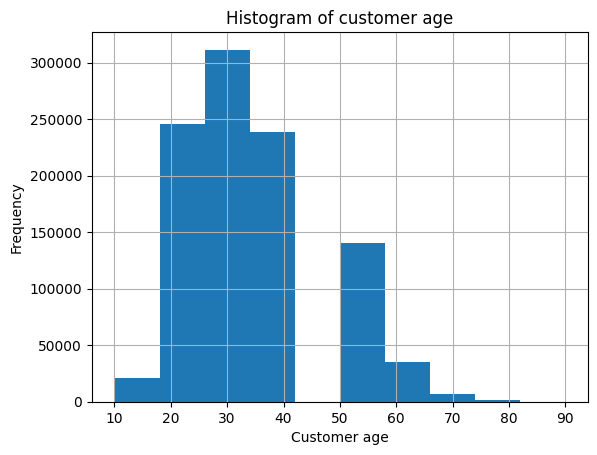

In [ ]:
#histogram for numeric
df['customer_age'].hist()
plt.xlabel('Customer age')
plt.ylabel('Frequency')
plt.title('Histogram of customer age')
plt.show()

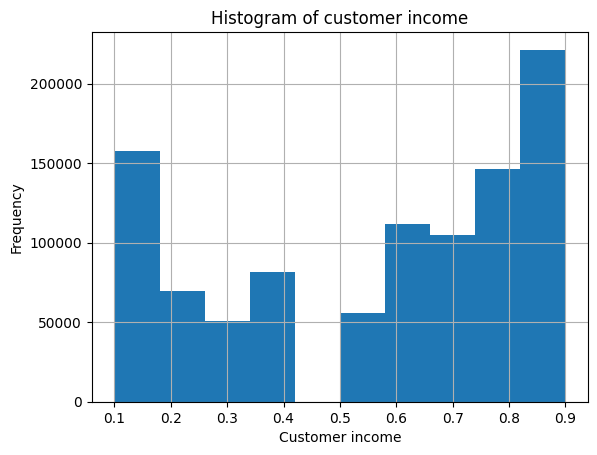

In [ ]:
df['income'].hist()
plt.xlabel('Customer income')
plt.ylabel('Frequency')
plt.title('Histogram of customer income')
plt.show()

In [ ]:
df['payment_type'].value_counts() ##frequency of unique values in categorical


AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64

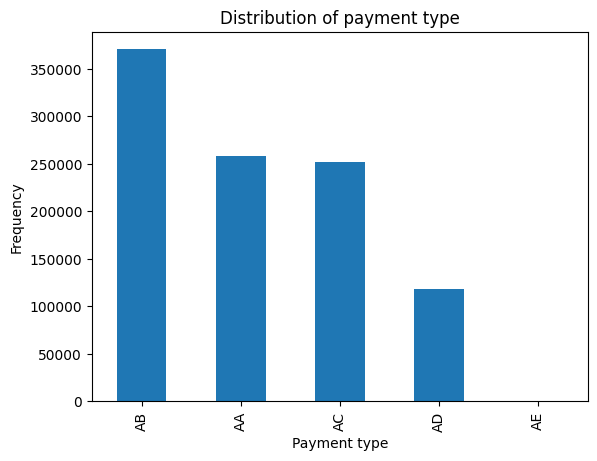

In [ ]:
df['payment_type'].value_counts().plot(kind='bar')
plt.xlabel('Payment type')
plt.ylabel('Frequency')
plt.title('Distribution of payment type')
plt.show()

In [ ]:
df['employment_status'].value_counts()

CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: employment_status, dtype: int64

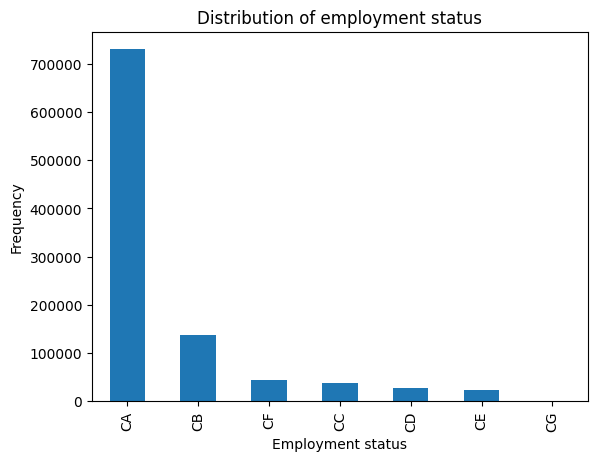

In [ ]:
df['employment_status'].value_counts().plot(kind='bar')
plt.xlabel('Employment status')
plt.ylabel('Frequency')
plt.title('Distribution of employment status')
plt.show()

In [ ]:
df['housing_status'].value_counts()

BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: housing_status, dtype: int64

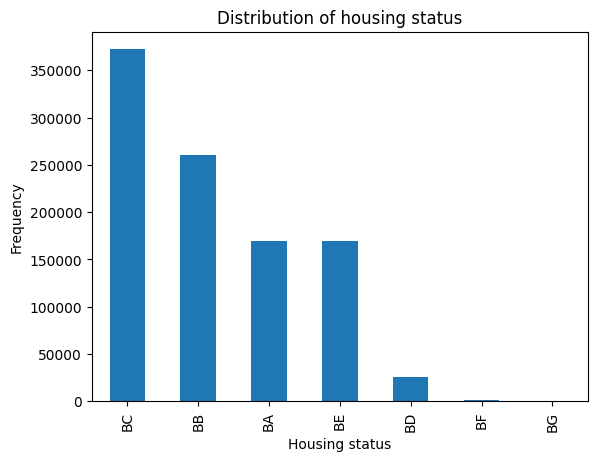

In [ ]:
df['housing_status'].value_counts().plot(kind='bar')
plt.xlabel('Housing status')
plt.ylabel('Frequency')
plt.title('Distribution of housing status')
plt.show()

In [ ]:
df['source'].value_counts()

INTERNET    992952
TELEAPP       7048
Name: source, dtype: int64

In [ ]:
df['device_os'].value_counts()

other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: device_os, dtype: int64

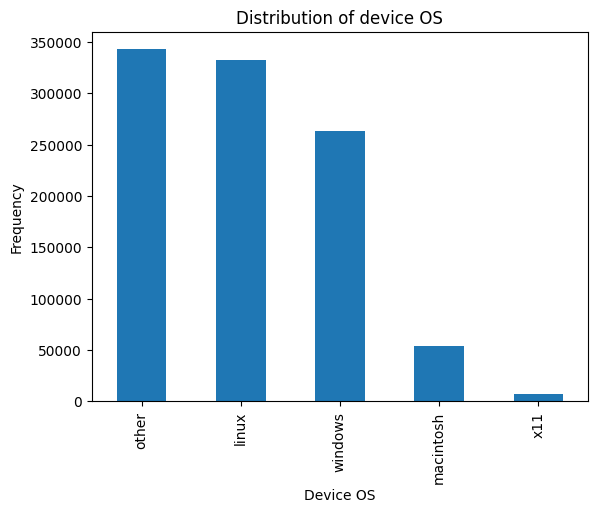

In [ ]:
df['device_os'].value_counts().plot(kind='bar')
plt.xlabel('Device OS')
plt.ylabel('Frequency')
plt.title('Distribution of device OS')
plt.show()

In [ ]:
##use 10% of data (e.g. for tSNE to check how fast it runs)

# Get the number of samples
num_samples = len(df)

# Calculate the number of samples to select (10%)
num_samples_to_select = int(0.10 * num_samples)

# Check if the number of samples to select exceeds the number of rows
if num_samples_to_select > num_samples:
    num_samples_to_select = num_samples

# Randomly select the specified number of samples
selected_df = df.sample(n=num_samples_to_select, random_state=42)

In [7]:
#only numeric data
columns_to_drop = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']  # Replace with the column names you want to drop

df_num = df.drop(columns=columns_to_drop)

In [13]:
df_pca = df.drop(columns=columns_to_drop)

In [9]:
#t-SNE model with increased perplexity and adjusted learning rate ##takes around 8min on 10% of the data -> tried LR 200 and perp 50; minor improvement ->
##for the lr 100 and perp 100 the runtime is 11min
tsne = TSNE(n_components=2, perplexity=100, learning_rate=100, random_state=42, init='pca')

#fit and transform the data
X_tsne = tsne.fit_transform(df_num)

c:\Users\madal\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


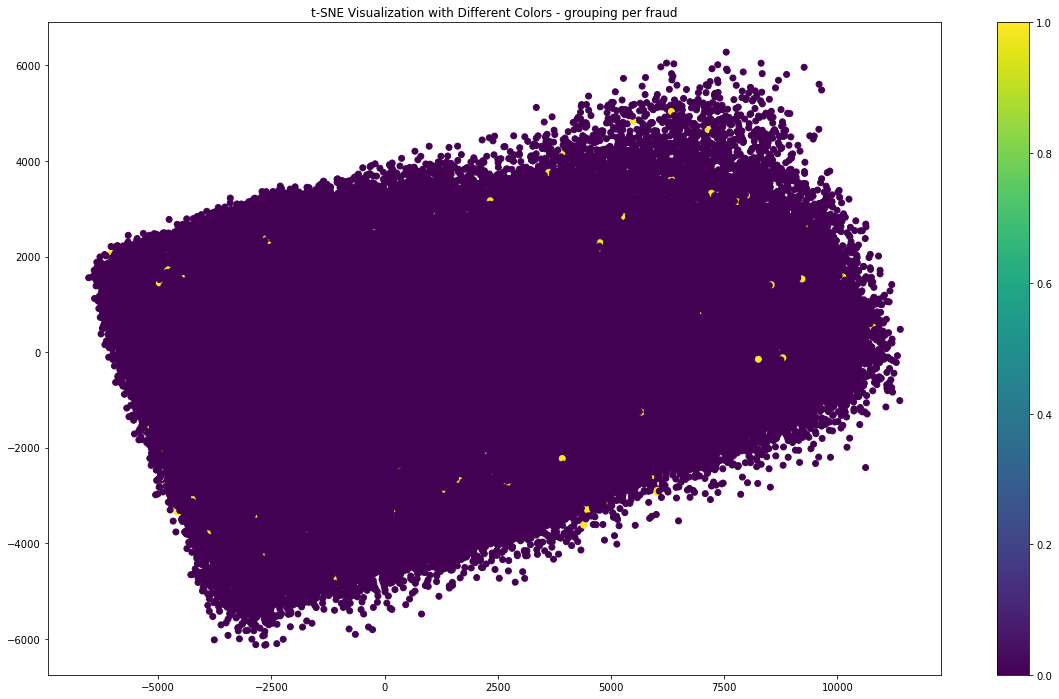

In [12]:
##visualize the results on the improved parameters for the fraud_bool variable
#create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=["Component 1", "Component 2"])

group_column = df_num['fraud_bool']

# Label encode the 'employment_status' column
label_encoder = LabelEncoder()
group_column_encoded = label_encoder.fit_transform(group_column)

# Plot the t-SNE visualization with different colors for each group
plt.figure(figsize=(20, 12))
plt.scatter(tsne_df["Component 1"], tsne_df["Component 2"], c=group_column_encoded, cmap='viridis')  #colormap for colors
plt.title("t-SNE Visualization with Different Colors - grouping per fraud")
plt.colorbar()  #add a colorbar to show the mapping of colors to groups
plt.show()

<ipython-input-9-6fc11bef094d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


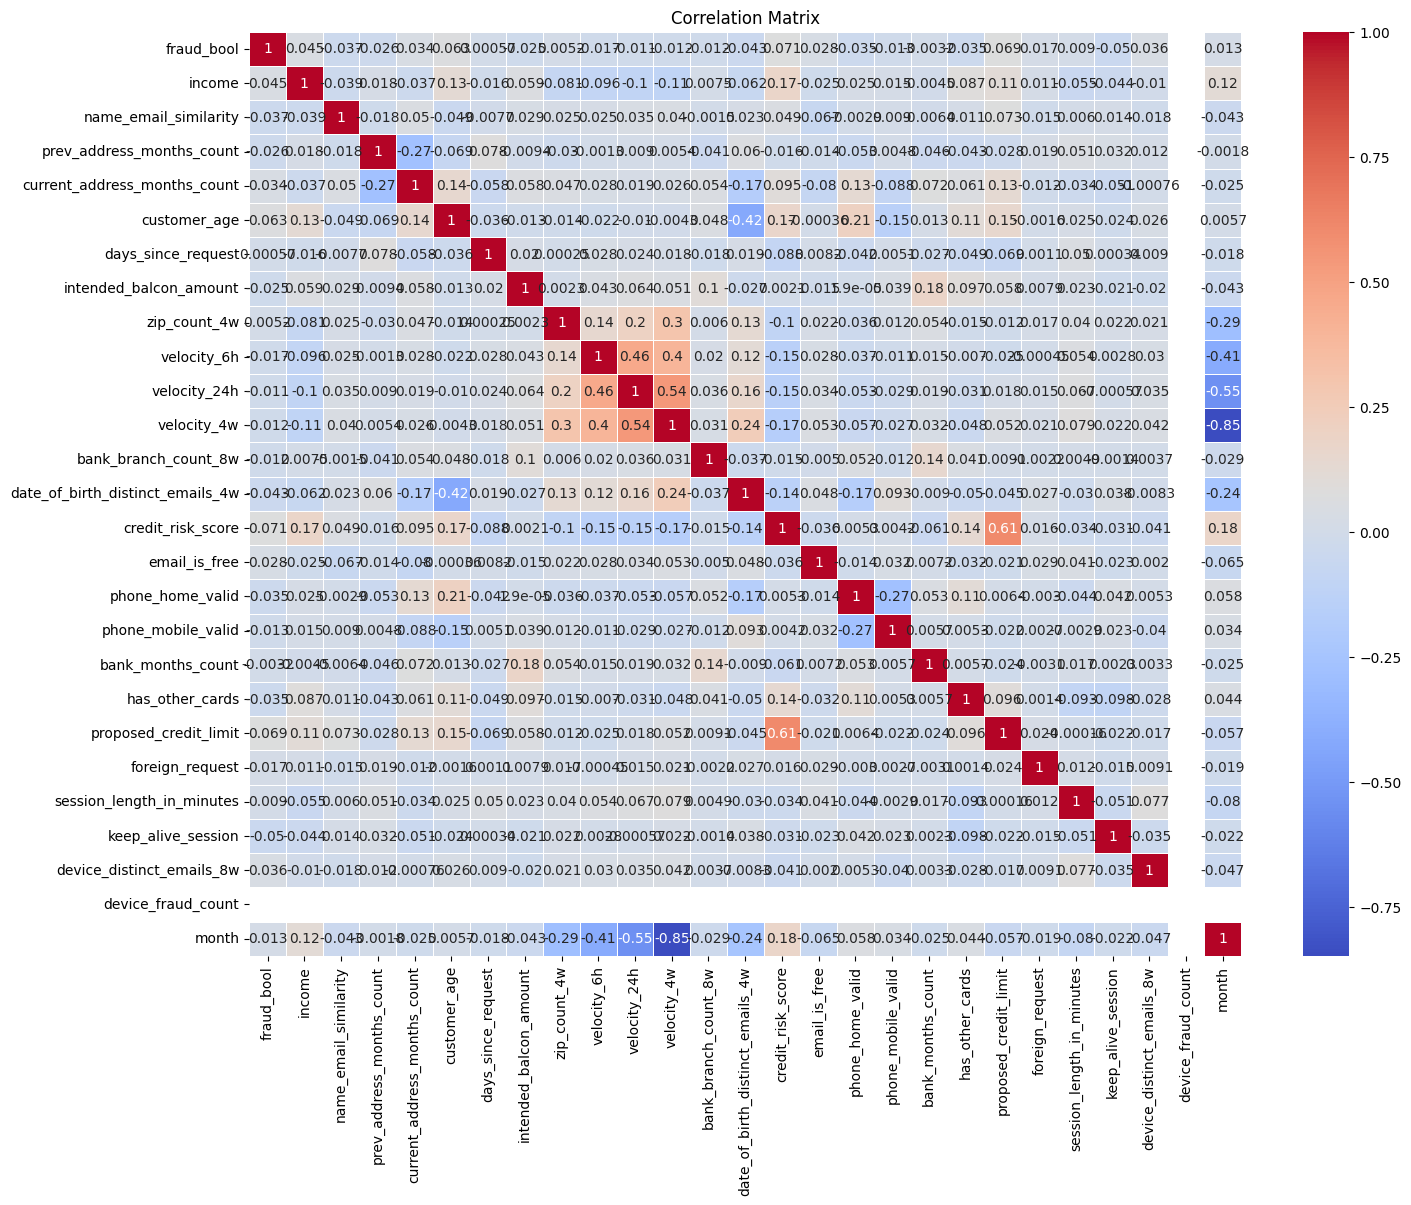

In [ ]:
#correlation matrix
correlation_matrix = df.corr()

#visualize using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
##PCA
#split into features and target
X = df_pca.drop('fraud_bool', axis=1)
y = df_pca['fraud_bool']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#initialize and fit PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
#https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c

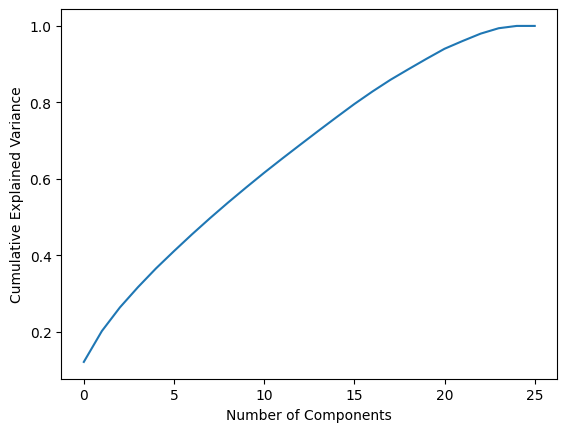

In [ ]:
#look at the explained variance to decide on the number of principal components to retain
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

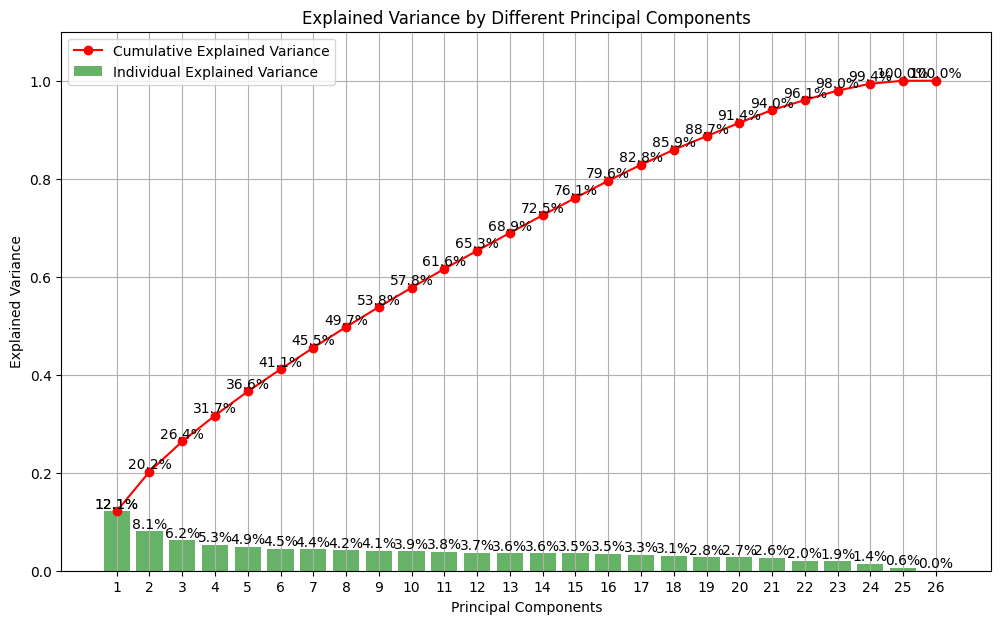

In [ ]:
#individual explained variances for components
individual_variances = pca.explained_variance_ratio_

#compute the cumulative explained variance
cumulative_variances = np.cumsum(individual_variances)

#create the bar plot for individual variances
plt.figure(figsize=(12, 7))
bar = plt.bar(range(1, len(individual_variances) + 1), individual_variances, alpha=0.6, color='g',
              label='Individual Explained Variance')

#create the line plot for cumulative variance
line = plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, marker='o', linestyle='-',
                color='r', label='Cumulative Explained Variance')

#adding percentage values on top of bars and dots
for i, (bar, cum_val) in enumerate(zip(bar, cumulative_variances)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{individual_variances[i]*100:.1f}%',
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')

#aesthetics for the plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(1, len(individual_variances) + 1))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  #extend y-axis limit to accommodate text labels
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Scree Plot')

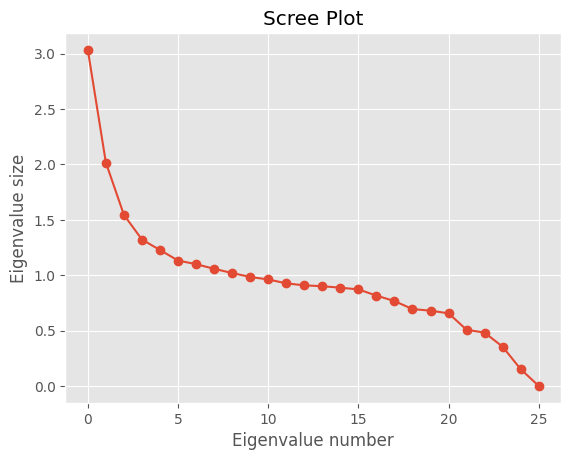

In [ ]:
plt.style.use("ggplot")
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [ ]:
##use first 3 components???
num_components = 3
X_pca = pca.transform(X_scaled)[:, :num_components]

In [ ]:
components = pca.components_

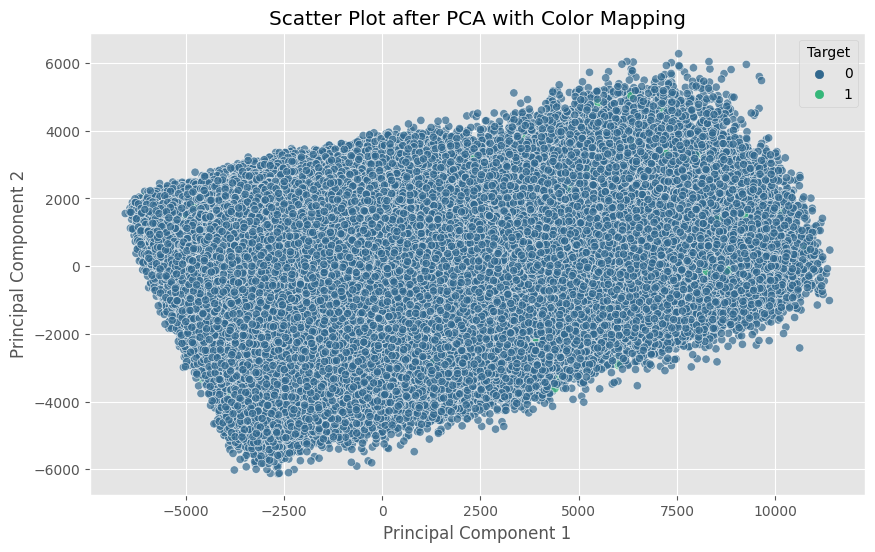

In [ ]:
# Assuming X contains your original data
# Perform PCA
pca = PCA(n_components=2)  # Set the desired number of components
X_pca = pca.fit_transform(X)

# Convert the result to a DataFrame
df_voor_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the target variable to the DataFrame
df_voor_pca['Target'] = y

# Plot the scatter plot with color mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_voor_pca, palette='viridis', alpha=0.7)
plt.title('Scatter Plot after PCA with Color Mapping')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()

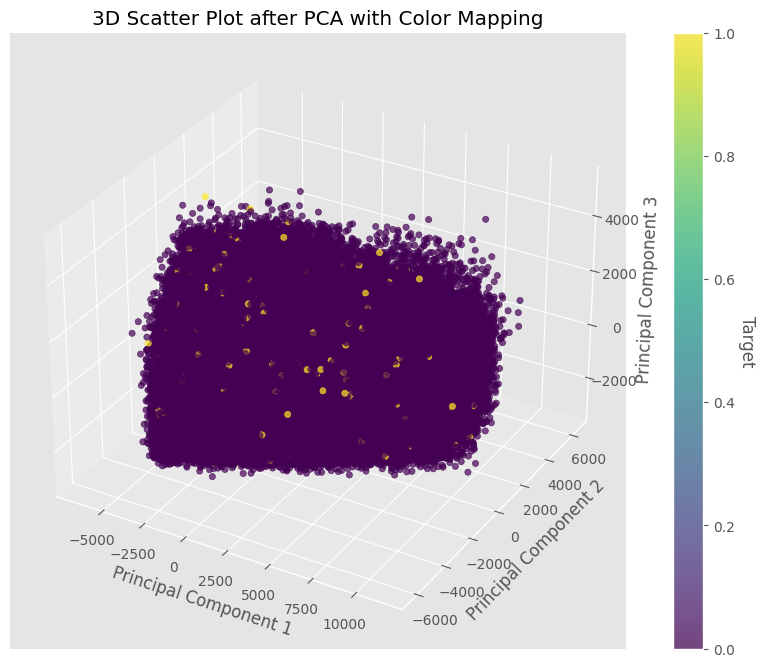

In [ ]:
# Assuming X contains your original data
# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Convert the result to a DataFrame
df_pca2 = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Add the target variable to the DataFrame
df_pca2['Target'] = y

# Plot the 3D scatter plot with color mapping
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca2['PC1'], df_pca2['PC2'], df_pca2['PC3'], c=df_pca2['Target'], cmap='viridis', alpha=0.7)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot after PCA with Color Mapping')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Target', rotation=270, labelpad=15)

plt.show()

In [ ]:
#df of features to calculate VIF for

VIFdf = df[['credit_risk_score', 'proposed_credit_limit']]

#VIF
vif = pd.DataFrame()
vif["Feature"] = VIFdf.columns
vif["VIF"] = [variance_inflation_factor(VIFdf.values, i) for i in range(VIFdf.shape[1])]
print(vif)

                 Feature       VIF
0      credit_risk_score  3.342646
1  proposed_credit_limit  3.342646


In [ ]:

VIFdf = df[['velocity_4w', 'month']]

#VIF
vif = pd.DataFrame()
vif["Feature"] = VIFdf.columns
vif["VIF"] = [variance_inflation_factor(VIFdf.values, i) for i in range(VIFdf.shape[1])]
print(vif)

       Feature       VIF
0  velocity_4w  2.124086
1        month  2.124086


In [ ]:

VIFdf = df[['velocity_4w', 'velocity_24h']]

#VIF
vif = pd.DataFrame()
vif["Feature"] = VIFdf.columns
vif["VIF"] = [variance_inflation_factor(VIFdf.values, i) for i in range(VIFdf.shape[1])]
print(vif)

        Feature        VIF
0   velocity_4w  15.956175
1  velocity_24h  15.956175


In [ ]:

VIFdf = df[['velocity_6h', 'velocity_24h']]

#VIF
vif = pd.DataFrame()
vif["Feature"] = VIFdf.columns
vif["VIF"] = [variance_inflation_factor(VIFdf.values, i) for i in range(VIFdf.shape[1])]
print(vif)

        Feature       VIF
0   velocity_6h  5.695659
1  velocity_24h  5.695659


In [ ]:

VIFdf = df[['date_of_birth_distinct_emails_4w', 'customer_age']]

#VIF
vif = pd.DataFrame()
vif["Feature"] = VIFdf.columns
vif["VIF"] = [variance_inflation_factor(VIFdf.values, i) for i in range(VIFdf.shape[1])]
print(vif)

                            Feature       VIF
0  date_of_birth_distinct_emails_4w  2.421123
1                      customer_age  2.421123


<ipython-input-8-6c7c187b994c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


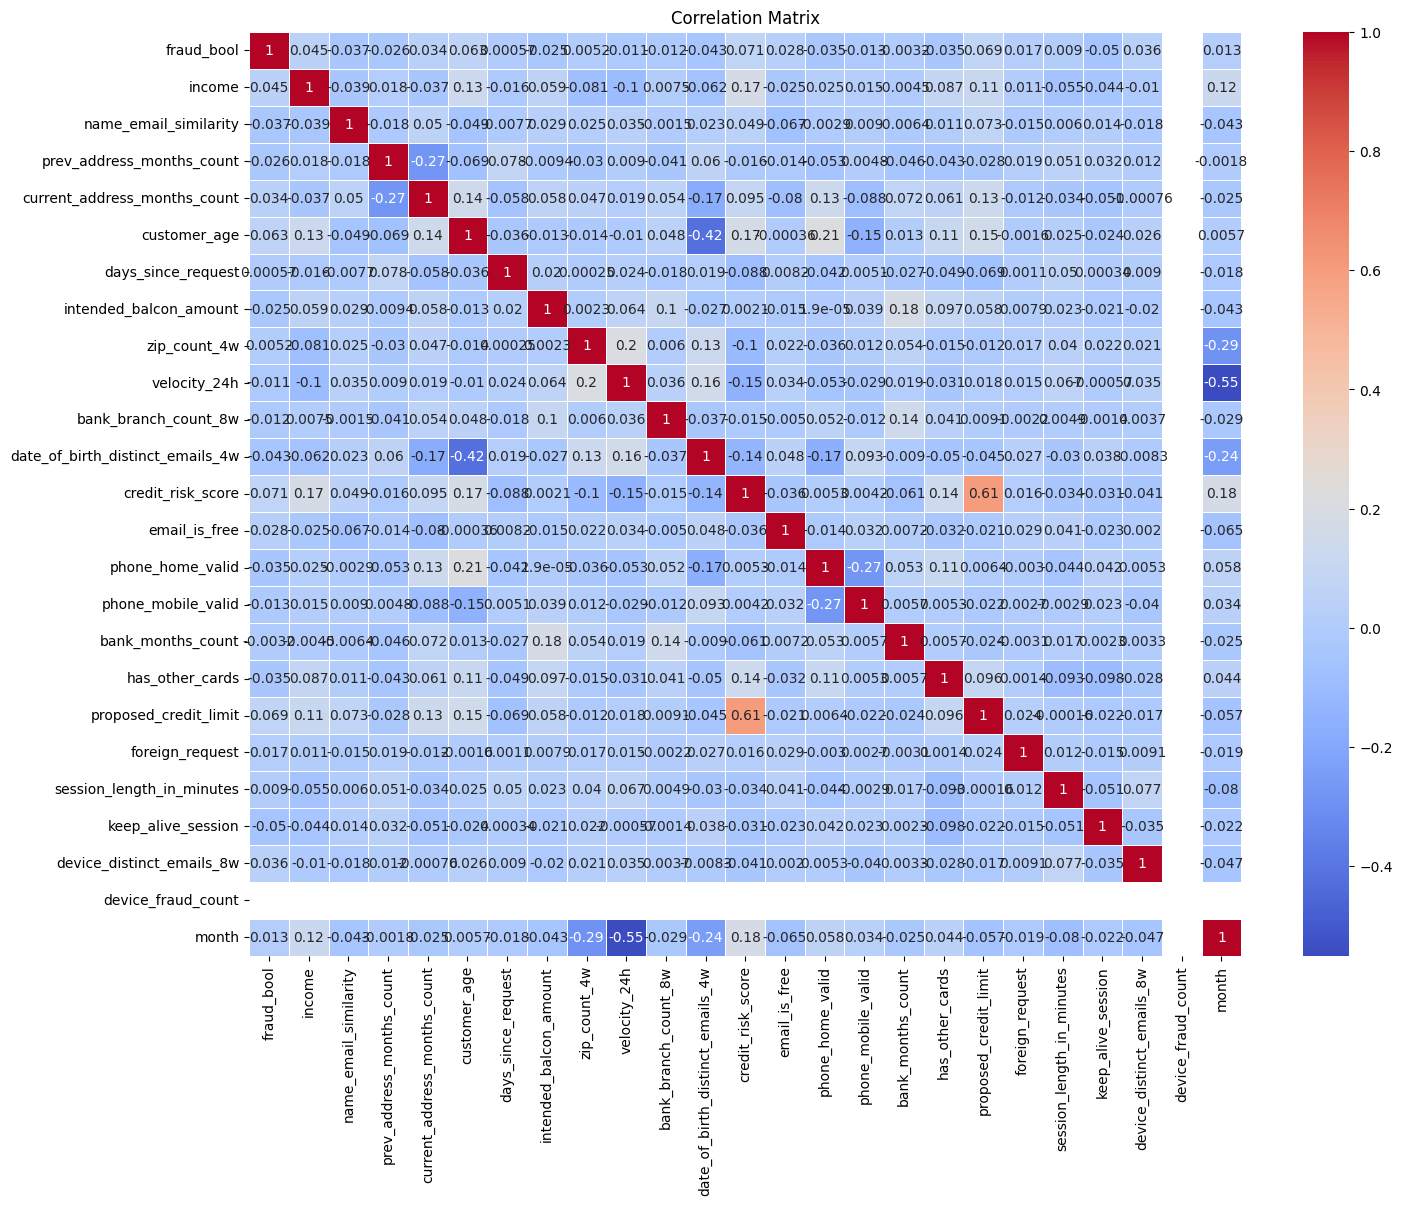

In [ ]:
#correlation matrix
correlation_matrix = df.corr()

#visualize using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
VIFdf = df[['velocity_24h', 'month']]

#VIF
vif = pd.DataFrame()
vif["Feature"] = VIFdf.columns
vif["VIF"] = [variance_inflation_factor(VIFdf.values, i) for i in range(VIFdf.shape[1])]
print(vif)

        Feature       VIF
0  velocity_24h  1.971086
1         month  1.971086


In [ ]:
##drop 

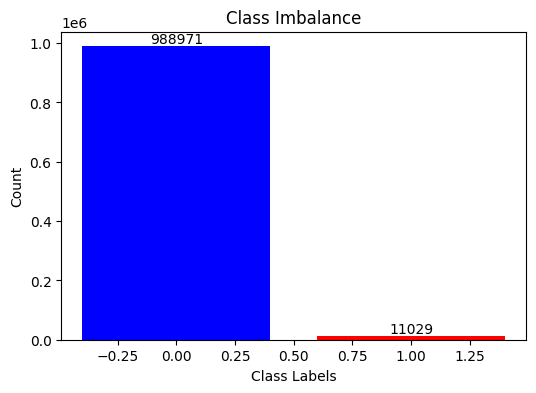

In [ ]:
class_counts = df['fraud_bool'].value_counts()
class_labels = class_counts.index
class_sizes = class_counts.values

plt.figure(figsize=(6, 4))

#bar plot to visualize class imbalance
plt.bar(class_labels, class_sizes, color=['blue', 'red'])

plt.title('Class Imbalance')
plt.xlabel('Class Labels')
plt.ylabel('Count')

#labels on top of the bars
for i, size in enumerate(class_sizes):
    plt.text(i, size, f'{size}', ha='center', va='bottom')

plt.show()

In [ ]:
##data split, first visualize target variable in each month

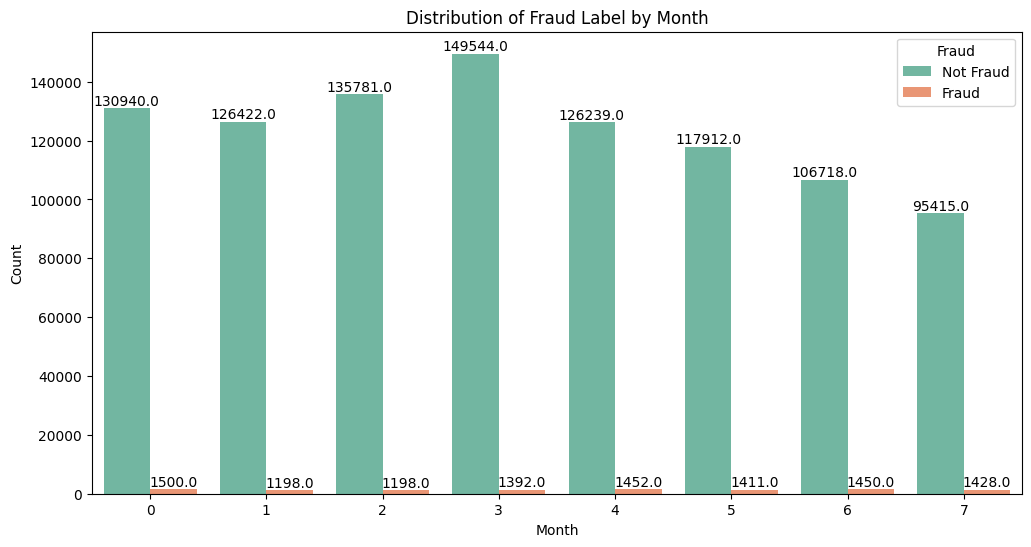

In [ ]:
plt.figure(figsize=(12, 6))

# Create the countplot
ax = sns.countplot(data=df, x='month', hue='fraud_bool', palette='Set2')

# Annotate the count of instances for each class
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Fraud Label by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()

In [15]:
##drop credit limit and both velocity columns
df = df.drop(columns=['proposed_credit_limit', 'velocity_4w', 'velocity_6h'])

In [ ]:
##use 10% of data

# Get the number of samples
num_samples = len(df)

# Calculate the number of samples to select (10%)
num_samples_to_select = int(0.10 * num_samples)

# Check if the number of samples to select exceeds the number of rows
if num_samples_to_select > num_samples:
    num_samples_to_select = num_samples

# Randomly select the specified number of samples
selected_df = df.sample(n=num_samples_to_select, random_state=42)

In [16]:
#split into features and target - again - after PCA
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

In [17]:
#a new column combining 'month' and 'y' values for stratified splitting
df['month_y'] = df['month'].astype(str) + '_' + df['fraud_bool'].astype(str)

#StratifiedShuffleSplit with 8 splits
sss = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

#a list to store the indices of train and test data for each split
split_indices = []

for train_index, test_index in sss.split(df, df['month_y']):
    split_indices.append((train_index, test_index))

#drop the temporary 'month_y' column
df.drop(columns=['month_y'], inplace=True)

#8 sets of train and test sets in 'split_indices' based on 'month' and 'y'
#use these indices to create train and test sets for 8 splits
for i, (train_index, test_index) in enumerate(split_indices):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]


In [18]:
#further split it into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming you have a list of categorical columns
categorical_cols = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# Step 1: Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_train', StandardScaler(with_mean=False), X_train.select_dtypes(exclude=['object']).columns),
        ('num_valid', StandardScaler(with_mean=False), X_valid.select_dtypes(exclude=['object']).columns),
        ('num_test', StandardScaler(with_mean=False), X_test.select_dtypes(exclude=['object']).columns),
        ('cat_train', OneHotEncoder(), categorical_cols),
        ('cat_valid', OneHotEncoder(), categorical_cols),
        ('cat_test', OneHotEncoder(), categorical_cols)
    ],
    sparse_threshold=0.0  # Adjust the threshold based on your data
)

# Step 2: Create a Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Step 3: Apply the pipeline to your data
X_train_transformed = pipeline.fit_transform(X_train)
X_valid_transformed = pipeline.transform(X_valid)
X_test_transformed = pipeline.transform(X_test)


In [ ]:
## use SMOTE to deal with class imbalance

In [ ]:
#standardize features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
#ecoded and scaled: X_train_encoded_scaled, X_test_encoded_scaled

array([[ 0.8166011 , -1.3217638 , -0.40089252, ..., -0.72310531,
        -0.59740181, -0.08474197],
       [-1.59308946, -1.08020658,  0.32260674, ..., -0.72310531,
         1.67391524, -0.08474197],
       [-1.59308946,  0.52043893, -0.40089252, ...,  1.38292443,
        -0.59740181, -0.08474197],
       ...,
       [ 1.16084261,  1.73263471,  0.27738803, ..., -0.72310531,
         1.67391524, -0.08474197],
       [-1.59308946,  1.2691197 , -0.40089252, ...,  1.38292443,
        -0.59740181, -0.08474197],
       [-0.56036493,  0.29462031,  2.60615127, ..., -0.72310531,
        -0.59740181, -0.08474197]])

In [24]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed

X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

In [26]:

logistic_regression = LogisticRegression(max_iter = 1000)

cv_folds = 10
cv_scores_smote = cross_val_score(logistic_regression, X_train_smote, y_train_smote, cv=cv_folds, scoring='f1_macro')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores_smote)
print("Mean CV Score:", cv_scores_smote.mean())

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42
)

# Fit the random search to your data
random_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_regression.fit(X_train_smote, y_train_smote)

# Make predictions on the validation data
y_pred = best_logistic_regression.predict(X_valid_transformed)

Cross-Validation Scores: [0.81919112 0.82226565 0.82152308 0.82070141 0.82296032 0.82206774
 0.82033656 0.82182155 0.82144242 0.82095212]
Mean CV Score: 0.8213261951374464


c:\Users\madal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\madal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\madal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\madal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\madal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\madal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Best Hyperparameters LR SMOTE: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 1}


In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[130143  28181]
 [   412   1264]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    158324
           1       0.04      0.75      0.08      1676

    accuracy                           0.82    160000
   macro avg       0.52      0.79      0.49    160000
weighted avg       0.99      0.82      0.89    160000



In [34]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8924


In [29]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4911


In [30]:
# Create a classification report to get class labels and other metrics
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.90
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.82
Class macro: F1 Score = 0.49
Class weighted: F1 Score = 0.89


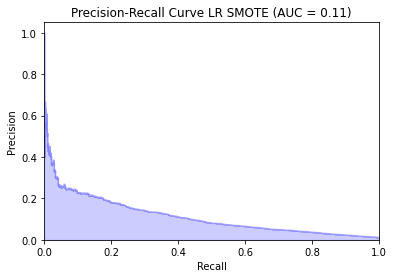

Area Under the Curve LR SMOTE (AUC): 0.1139


In [31]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR SMOTE (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR SMOTE (AUC): {auc_score:.4f}")

In [32]:
# Learning curve function
def plot_learning_curve(model, X, y, scoring, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


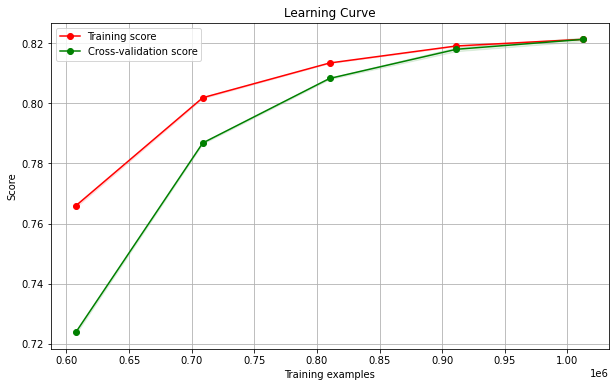

In [33]:
# Plot learning curve on train
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_smote, y_train_smote, scoring, train_sizes)

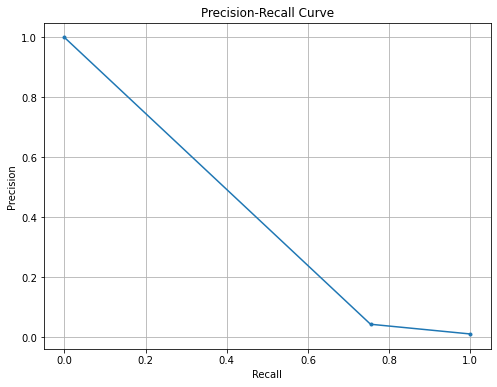

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


precision, recall, thresholds = precision_recall_curve(y_valid, y_pred)

#plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [46]:
average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0349


In [35]:
### save all the dataset splits 
#convert the transformed arrays/matrices back to pandas df
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_valid_transformed_df = pd.DataFrame(X_valid_transformed)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

#save dfs to csv files
X_train_transformed_df.to_csv('X_train_transformed.csv', index=False)
X_valid_transformed_df.to_csv('X_valid_transformed.csv', index=False)
X_test_transformed_df.to_csv('X_test_transformed.csv', index=False)


In [36]:
y_train_df = pd.DataFrame(y_train)
y_valid_df = pd.DataFrame(y_valid)
y_test_df = pd.DataFrame(y_test)

y_train_df.to_csv('y_train.csv', index=False)
y_valid_df.to_csv('y_valid.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

In [39]:
##SMOTE baseline model 
#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_smote_baseline.pkl')

['log_reg_smote_baseline.pkl']

In [ ]:
## logistic regression with ADASYN

In [ ]:
X_train_oversampled, y_train_oversampled = adasyn.fit_resample(X_train_transformed, y_train)

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)

cv_folds = 10
cv_scores_adasyn = cross_val_score(logistic_regression, X_train_oversampled, y_train_oversampled, cv=cv_folds, scoring='f1_macro')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores_adasyn)
print("Mean CV Score:", cv_scores_adasyn.mean())


# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42
)

# Fit the random search to your data
random_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR ADASYN:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_regression.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test data
y_pred = best_logistic_regression.predict(X_test_encoded_scaled)


Cross-Validation Scores: [0.80233463 0.82336699 0.80936526 0.81031    0.82476466 0.8105721
 0.82551433 0.83769635 0.81018167 0.82513136]
Mean CV Score: 0.8179237356800215


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 

Best Hyperparameters LR SMOTE: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[16203  3584]
 [   55   158]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     19787
           1       0.04      0.74      0.08       213

    accuracy                           0.82     20000
   macro avg       0.52      0.78      0.49     20000
weighted avg       0.99      0.82      0.89     20000



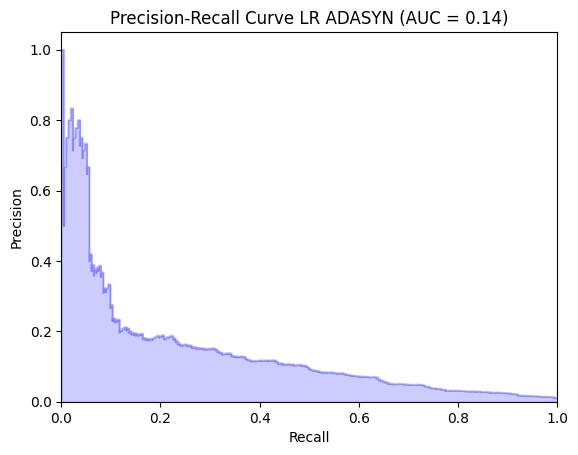

Area Under the Curve LR ADASYN (AUC): 0.1406


In [ ]:
precision, recall, _ = precision_recall_curve(y_test, best_logistic_regression.predict_proba(X_test_encoded_scaled)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR ADASYN (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR ADASYN (AUC): {auc_score:.4f}")

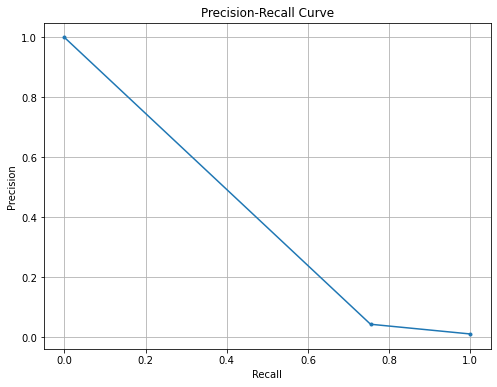

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


precision, recall, thresholds = precision_recall_curve(y_valid, y_pred)

#plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0349


In [44]:
class_report = classification_report(y_valid, y_pred)

#F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.90
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.82
Class macro: F1 Score = 0.49
Class weighted: F1 Score = 0.89


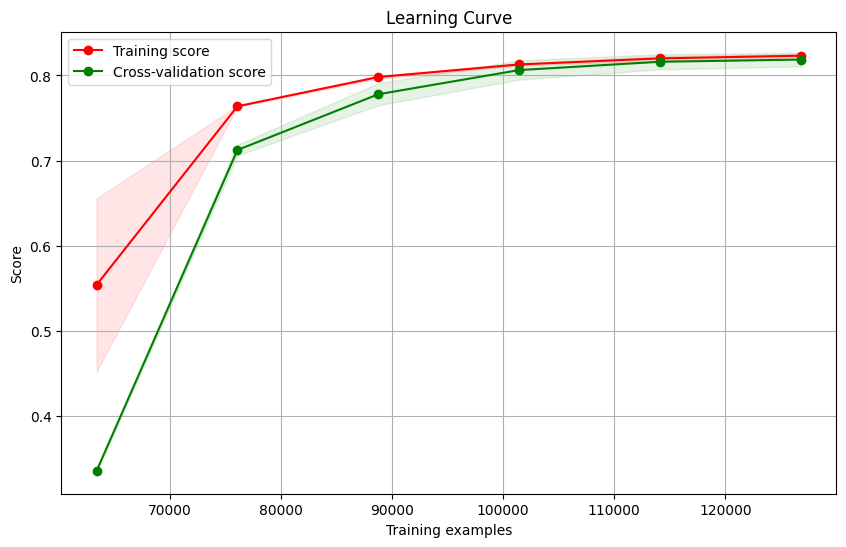

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_oversampled, y_train_oversampled, scoring, train_sizes)

In [ ]:
##SMOTE with class weight
#calc the weight for the positive class
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91

#set the class weights
class_weights = {0: 1, 1: weight_positive}
logistic_regression = LogisticRegression(class_weight=class_weights)

cv_folds = 10
cv_scores_smote_cw = cross_val_score(logistic_regression, X_train_smote, y_train_smote, cv=cv_folds, scoring='f1_macro')

#cv scores
print("Cross-Validation Scores:", cv_scores_smote_cw)
print("Mean CV Score:", cv_scores_smote_cw.mean())

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42
)

#fit the random search to the data
random_search.fit(X_train_smote, y_train_smote)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE:", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression_cw = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression_cw.fit(X_train_smote, y_train_smote)

#predictions on the test data
y_pred_cw = best_logistic_regression_cw.predict(X_test_encoded_scaled)

Cross-Validation Scores: [0.49413653 0.49890766 0.49587566 0.49239257 0.49565853 0.49787097
 0.50078616 0.50272216 0.49635407 0.49722132]
Mean CV Score: 0.4971925633847046


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 

Best Hyperparameters LR SMOTE: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 0.1}


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cw))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cw))

Confusion Matrix:
[[16307  3480]
 [   55   158]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     19787
           1       0.04      0.74      0.08       213

    accuracy                           0.82     20000
   macro avg       0.52      0.78      0.49     20000
weighted avg       0.99      0.82      0.89     20000



In [ ]:
y_pred_val = best_logistic_regression.predict(X_train_encoded_scaled)  #CM on train?
confusion_matrix_val = confusion_matrix(y_train, y_pred_val)
print("Confusion Matrix (Train Data):")
print(confusion_matrix_val)


Confusion Matrix (Train Data):
[[64815 14330]
 [  197   658]]


In [ ]:
f1 = f1_score(y_train, y_pred_val, average = "macro") ##on train
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4911


In [ ]:
f1 = f1_score(y_test, y_pred_cw, average = "macro") ##on test
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4921


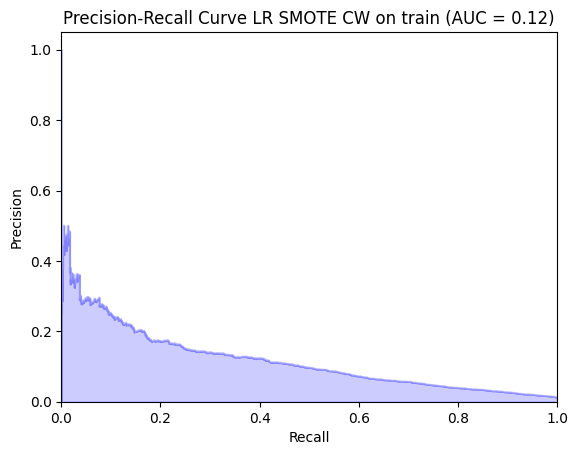

Area Under the Curve LR SMOTE CW on train (AUC): 0.1164


In [ ]:
precision, recall, _ = precision_recall_curve(y_train, best_logistic_regression.predict_proba(X_train_encoded_scaled)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR SMOTE CW on train (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR SMOTE CW on train (AUC): {auc_score:.4f}")

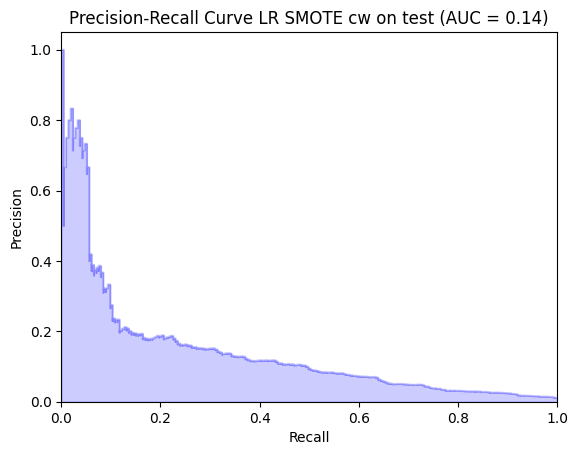

Area Under the Curve LR SMOTE cw on test (AUC): 0.1406


In [ ]:
##on test

precision, recall, _ = precision_recall_curve(y_test, best_logistic_regression.predict_proba(X_test_encoded_scaled)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR SMOTE cw on test (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR SMOTE cw on test (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_test, y_pred_cw)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0350


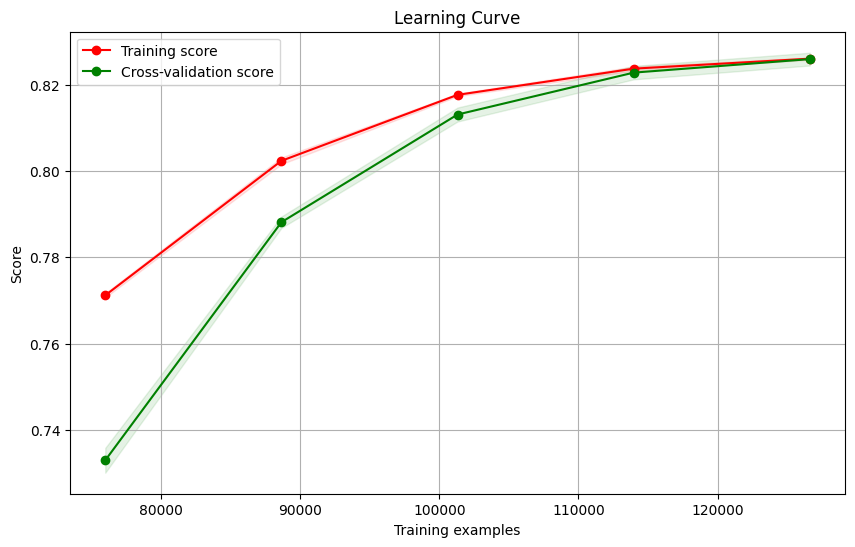

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression_cw, X_train_smote, y_train_smote, scoring, train_sizes)

In [ ]:
#only transactional data
columns_to_drop_pers = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'employment_status', 'credit_risk_score']  # Replace with the column names you want to drop

df_trans = selected_df.drop(columns=columns_to_drop_pers)

In [ ]:
#split into features and target
X = df_trans.drop('fraud_bool', axis=1)
y = df_trans['fraud_bool']

In [ ]:

#create a new column combining 'month' and 'y' values for stratified splitting
#equal proportions of data for each 'month' and 'y' combination
selected_df['month_y'] = selected_df['month'].astype(str) + '_' + selected_df['fraud_bool'].astype(str)

#StratifiedShuffleSplit with 8 splits
sss = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

#a list to store the indices of train and test data for each split
split_indices = []

for train_index, test_index in sss.split(selected_df, selected_df['month_y']):
    split_indices.append((train_index, test_index))

#drop the temporary 'month_y' column
selected_df.drop(columns=['month_y'], inplace=True)

#8 sets of train and test sets in 'split_indices' based on 'month' and 'y'
#use these indices to create train and test sets for 8 splits
for i, (train_index, test_index) in enumerate(split_indices):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

In [ ]:
#one-hot encoding on the dataset
X_test_encoded = pd.get_dummies(X_test)

#scale the data
scaler = StandardScaler()
X_test_encoded_scaled = scaler.fit_transform(X_test_encoded)

#one-hot encoding on the dataset
X_train_encoded = pd.get_dummies(X_train)

#scale the data
scaler = StandardScaler()
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed

X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded_scaled, y_train)

In [ ]:
##SMOTE with class weights trained on data with no person-specific features (same best params)
#
logistic_regression_nopers = LogisticRegression(class_weight=class_weights)

cv_folds = 10
cv_scores_smote_cw = cross_val_score(logistic_regression_nopers, X_train_smote, y_train_smote, cv=cv_folds, scoring='f1_macro')

#cv scores
print("Cross-Validation Scores:", cv_scores_smote_cw)
print("Mean CV Score:", cv_scores_smote_cw.mean())

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
}


random_search = RandomizedSearchCV(
    logistic_regression_nopers, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42
)

#fit the random search to your data
random_search.fit(X_train_smote, y_train_smote)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE CW no-pers:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression_nopers = LogisticRegression(**best_params)


# Fit the model to the training data
best_logistic_regression_nopers.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_nopers = best_logistic_regression_nopers.predict(X_test_encoded_scaled)

Cross-Validation Scores: [0.41452822 0.41341548 0.41254867 0.41230079 0.41304414 0.41555268
 0.4128332  0.41997759 0.4099775  0.41320473]
Mean CV Score: 0.41373829866606043


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 

Best Hyperparameters LR SMOTE CW no-pers: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 0.1}


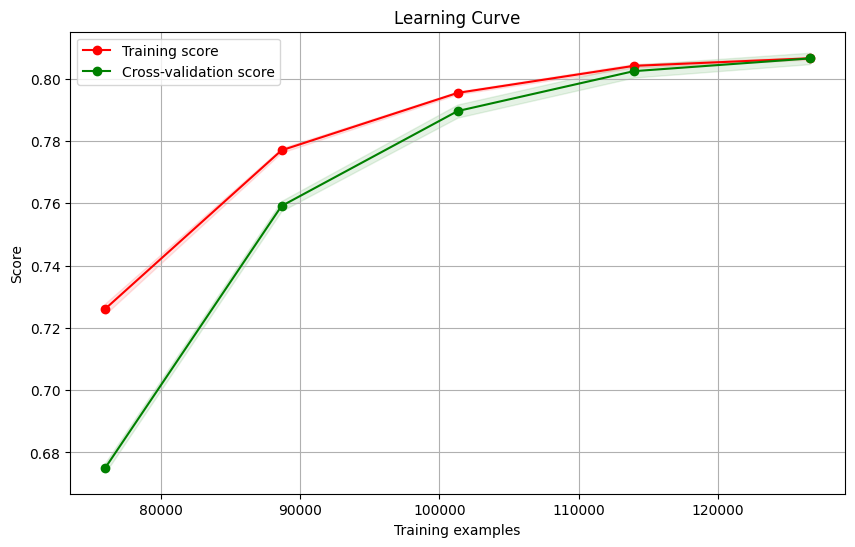

In [ ]:
# Plot learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression_nopers, X_train_smote, y_train_smote, scoring, train_sizes)

In [ ]:
# Evaluate the model using the F1 score
f1 = f1_score(y_test, y_pred_nopers, average="macro")
print("F1 Score:", f1)

F1 Score: 0.48296391456481846


In [ ]:
# Compute F1 scores separately for each class
f1_scores = f1_score(y_test, y_pred_nopers, average=None)

# You'll get an array of F1 scores, one for each class
print("F1 Scores for Each Class:", f1_scores)

F1 Scores for Each Class: [0.89183605 0.07409178]


In [ ]:
# Create a classification report to get class labels and other metrics
class_report = classification_report(y_test, y_pred_nopers)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.89
Class 1: F1 Score = 0.07
Class accuracy: F1 Score = 0.81
Class macro: F1 Score = 0.48
Class weighted: F1 Score = 0.88


In [ ]:
###the same on the full dataset

#split into features and target
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

selected_df['month_y'] = selected_df['month'].astype(str) + '_' + selected_df['fraud_bool'].astype(str)

# Initialize the StratifiedShuffleSplit with 8 splits
sss = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

# Initialize a list to store the indices of train and test data for each split
split_indices = []

for train_index, test_index in sss.split(selected_df, selected_df['month_y']):
    split_indices.append((train_index, test_index))

# Remove the temporary 'month_y' column
selected_df.drop(columns=['month_y'], inplace=True)

# Now, you have 8 sets of train and test indices in 'split_indices' based on 'month' and 'y'
# You can use these indices to create train and test sets for your 8 splits
for i, (train_index, test_index) in enumerate(split_indices):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    # Perform your modeling and evaluation for each split (i)

#one-hot encoding on the dataset
X_test_encoded = pd.get_dummies(X_test)

#scale the data
scaler = StandardScaler()
X_test_encoded_scaled = scaler.fit_transform(X_test_encoded)

#one-hot encoding on the dataset
X_train_encoded = pd.get_dummies(X_train)

#scale the data
scaler = StandardScaler()
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed

X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded_scaled, y_train)

In [ ]:
##SMOTE with class weights trained on data with no person-specific features (same best params)
# Create a logistic regression model
logistic_regression_nopers = LogisticRegression(class_weight=class_weights, max_iter = 500)

cv_folds = 10
cv_scores_smote_cw = cross_val_score(logistic_regression_nopers, X_train_smote, y_train_smote, cv=cv_folds, scoring='f1_macro')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores_smote_cw)
print("Mean CV Score:", cv_scores_smote_cw.mean())

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression_nopers, param_grid, cv=10, scoring='f1', n_iter=10, random_state=42
)

# Fit the random search to your data
random_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE CW no-pers:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression_nopers = LogisticRegression(**best_params)


# Fit the model to the training data
best_logistic_regression_nopers.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_nopers = best_logistic_regression_nopers.predict(X_test_encoded_scaled)

Cross-Validation Scores: [0.49550405 0.48630475 0.48030756 0.49397434 0.48742513 0.49454881
 0.489883   0.49219878 0.48315701 0.49357282 0.48267912 0.48667955
 0.48695035 0.48712794 0.49761357 0.47886782 0.48375717 0.48510764
 0.4857818  0.49306042]
Mean CV Score: 0.4882250812489623


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters LR SMOTE CW no-pers: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'C': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

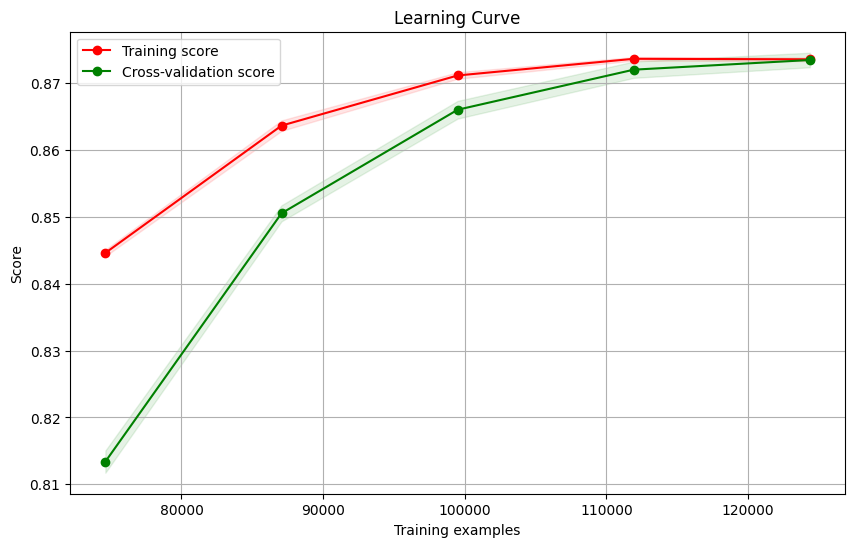

In [ ]:
#learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression_nopers, X_train_smote, y_train_smote, scoring, train_sizes)

In [ ]:
#evaluate the model using the F1 score
f1 = f1_score(y_test, y_pred_nopers, average="macro")
print("F1 Score:", f1)

F1 Score: 0.6113551237159199


In [ ]:
class_report = classification_report(y_test, y_pred_nopers)

#F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.94
Class 1: F1 Score = 0.29
Class accuracy: F1 Score = 0.88
Class macro: F1 Score = 0.61
Class weighted: F1 Score = 0.92


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer

#custom scorer
target = 1 # class to plot
scorer = make_scorer(lambda y_true, y_pred: f1_score(
    y_true, y_pred,
    labels=None,
    pos_label=target,
    average='binary',
    sample_weight=None))

train_sizes, train_scores, test_scores = learning_curve(
    estimator,
    X,
    y,
    cv=cv,
    scoring=scorer)